## Overview

In this tutorial, we will build a simple aritificial neural network (ANN), also known as multilayer perceptron (MLP) or feedforward neural network (FNN). The learning outcomes are:
1. Understand how the model is formulated mathematically;
2. Understand what is meant by training the network;
3. Experiment with more complex architectures.

## Data

We generate data from a Gaussian process with a specified covariance matrix. The details of data generation do not matter as in reality, you never know the actual data generation machanism.

**The key** here is that we want to predict $y \in R^5$ given the previous values $x\in R^{25}$.

In [1]:
# first let's generate data, you can ignore this part
import numpy as np
import sys
import os
sys.path.insert(1, '..')
os.chdir('..')

from data_formatters.dubosson2018 import *
from dataset import TSDataset
from conf import Conf

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# load config file
cnf = Conf(conf_file_path='./conf/dubosson.yaml', seed=15, exp_name="DUBOSSON", log=False)
data_formatter = DubossonFormatter(cnf)

# set up torch datasets: train, val, test
train_dataset = TSDataset(cnf, data_formatter, data_formatter.train_data)
val_dataset = TSDataset(cnf, data_formatter, data_formatter.val_data)
test_dataset = TSDataset(cnf, data_formatter, data_formatter.test_data)

from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Dropped segments: 0
Extracted segments: 9
Getting valid sampling locations.
# available segments=3539
Extracting all available segments.
1000 of 3539 samples done...
2000 of 3539 samples done...
3000 of 3539 samples done...
Getting valid sampling locations.
# available segments=7
Extracting all available segments.
Getting valid sampling locations.
# available segments=7
Extracting all available segments.


In [4]:
for i, d in enumerate(train_loader):
    print(d.get('inputs')())

tensor([[2014.,   10.,    4.,    4.,   55.,  135.],
        [2014.,   10.,    4.,    5.,    0.,  135.],
        [2014.,   10.,    4.,    5.,    5.,  135.],
        ...,
        [2014.,   10.,    4.,   20.,   40.,    0.],
        [2014.,   10.,    4.,   20.,   45.,    0.],
        [2014.,   10.,    4.,   20.,   50.,    0.]])
tensor([[2014.0000,   10.0000,    4.0000,    6.0000,   20.0000,  156.6000],
        [2014.0000,   10.0000,    4.0000,    6.0000,   25.0000,  156.6000],
        [2014.0000,   10.0000,    4.0000,    6.0000,   30.0000,  154.8000],
        ...,
        [2014.0000,   10.0000,    4.0000,   22.0000,    5.0000,    0.0000],
        [2014.0000,   10.0000,    4.0000,   22.0000,   10.0000,    0.0000],
        [2014.0000,   10.0000,    4.0000,   22.0000,   15.0000,    0.0000]])
tensor([[2.0140e+03, 1.0000e+01, 1.0000e+00, 1.0000e+01, 5.0000e+00, 6.8400e+01],
        [2.0140e+03, 1.0000e+01, 1.0000e+00, 1.0000e+01, 1.0000e+01, 7.2000e+01],
        [2.0140e+03, 1.0000e+01, 1.0000e

tensor([[2.0140e+03, 1.0000e+01, 2.0000e+00, 1.2000e+01, 4.0000e+01, 1.1700e+02],
        [2.0140e+03, 1.0000e+01, 2.0000e+00, 1.2000e+01, 4.5000e+01, 1.1160e+02],
        [2.0140e+03, 1.0000e+01, 2.0000e+00, 1.2000e+01, 5.0000e+01, 1.0620e+02],
        ...,
        [2.0140e+03, 1.0000e+01, 3.0000e+00, 4.0000e+00, 2.5000e+01, 0.0000e+00],
        [2.0140e+03, 1.0000e+01, 3.0000e+00, 4.0000e+00, 3.0000e+01, 0.0000e+00],
        [2.0140e+03, 1.0000e+01, 3.0000e+00, 4.0000e+00, 3.5000e+01, 0.0000e+00]])
tensor([[2.0140e+03, 1.0000e+01, 2.0000e+00, 9.0000e+00, 4.0000e+01, 1.5480e+02],
        [2.0140e+03, 1.0000e+01, 2.0000e+00, 9.0000e+00, 4.5000e+01, 1.4940e+02],
        [2.0140e+03, 1.0000e+01, 2.0000e+00, 9.0000e+00, 5.0000e+01, 1.4580e+02],
        ...,
        [2.0140e+03, 1.0000e+01, 3.0000e+00, 1.0000e+00, 2.5000e+01, 0.0000e+00],
        [2.0140e+03, 1.0000e+01, 3.0000e+00, 1.0000e+00, 3.0000e+01, 0.0000e+00],
        [2.0140e+03, 1.0000e+01, 3.0000e+00, 1.0000e+00, 3.5000e+01, 0.

In [6]:
for i, d in enumerate(train_loader):
    print(d.get('outputs'))

tensor([[[171.0000],
         [171.0000],
         [171.0000],
         [171.0000],
         [174.6000],
         [178.2000],
         [183.6000],
         [189.0000],
         [196.2000],
         [201.6000],
         [203.4000],
         [205.2000],
         [208.8000],
         [212.4000],
         [216.0000],
         [219.6000],
         [223.2000],
         [225.0000],
         [225.0000],
         [226.8000],
         [228.6000],
         [230.4000],
         [234.0000],
         [237.6000]],

        [[153.0000],
         [160.2000],
         [167.4000],
         [174.6000],
         [178.2000],
         [181.8000],
         [183.6000],
         [183.6000],
         [181.8000],
         [180.0000],
         [178.2000],
         [176.4000],
         [174.6000],
         [171.0000],
         [171.0000],
         [171.0000],
         [171.0000],
         [174.6000],
         [178.2000],
         [183.6000],
         [189.0000],
         [196.2000],
         [201.6000],
         [2

tensor([[[127.8000],
         [127.8000],
         [129.6000],
         [129.6000],
         [131.4000],
         [133.2000],
         [133.2000],
         [135.0000],
         [135.0000],
         [136.8000],
         [136.8000],
         [135.0000],
         [135.0000],
         [133.2000],
         [131.4000],
         [129.6000],
         [127.8000],
         [126.0000],
         [122.4000],
         [120.6000],
         [118.8000],
         [117.0000],
         [115.2000],
         [113.4000]],

        [[174.6000],
         [171.0000],
         [167.4000],
         [165.6000],
         [162.0000],
         [160.2000],
         [160.2000],
         [160.2000],
         [160.2000],
         [160.2000],
         [162.0000],
         [162.0000],
         [162.0000],
         [162.0000],
         [162.0000],
         [160.2000],
         [160.2000],
         [158.4000],
         [156.6000],
         [153.0000],
         [153.0000],
         [151.2000],
         [151.2000],
         [1

tensor([[[ 55.8000],
         [ 50.4000],
         [ 50.4000],
         [ 54.0000],
         [ 61.2000],
         [ 75.6000],
         [ 93.6000],
         [113.4000],
         [129.6000],
         [140.4000],
         [147.6000],
         [149.4000],
         [151.2000],
         [153.0000],
         [158.4000],
         [162.0000],
         [163.8000],
         [163.8000],
         [160.2000],
         [156.6000],
         [149.4000],
         [142.2000],
         [135.0000],
         [129.6000]],

        [[ 39.6000],
         [ 39.6000],
         [ 39.6000],
         [ 43.2000],
         [ 50.4000],
         [ 59.4000],
         [ 70.2000],
         [ 81.0000],
         [ 90.0000],
         [ 97.2000],
         [100.8000],
         [102.6000],
         [100.8000],
         [ 95.4000],
         [ 91.8000],
         [ 88.2000],
         [ 82.8000],
         [ 79.2000],
         [ 77.4000],
         [ 75.6000],
         [ 73.8000],
         [ 73.8000],
         [ 73.8000],
         [ 

tensor([[[ 93.6000],
         [ 86.4000],
         [ 77.4000],
         [ 68.4000],
         [ 61.2000],
         [ 55.8000],
         [ 50.4000],
         [ 50.4000],
         [ 54.0000],
         [ 61.2000],
         [ 75.6000],
         [ 93.6000],
         [113.4000],
         [129.6000],
         [140.4000],
         [147.6000],
         [149.4000],
         [151.2000],
         [153.0000],
         [158.4000],
         [162.0000],
         [163.8000],
         [163.8000],
         [160.2000]],

        [[282.6000],
         [282.6000],
         [284.4000],
         [284.4000],
         [284.4000],
         [282.6000],
         [277.2000],
         [273.6000],
         [268.2000],
         [262.8000],
         [259.2000],
         [255.6000],
         [252.0000],
         [252.0000],
         [250.2000],
         [250.2000],
         [250.2000],
         [248.4000],
         [248.4000],
         [248.4000],
         [246.6000],
         [246.6000],
         [248.4000],
         [2

tensor([[[252.0000],
         [252.0000],
         [252.0000],
         [250.2000],
         [250.2000],
         [248.4000],
         [246.6000],
         [246.6000],
         [244.8000],
         [243.0000],
         [241.2000],
         [239.4000],
         [234.0000],
         [228.6000],
         [223.2000],
         [219.6000],
         [216.0000],
         [214.2000],
         [214.2000],
         [212.4000],
         [210.6000],
         [207.0000],
         [201.6000],
         [198.0000]],

        [[ 81.0000],
         [ 90.0000],
         [ 97.2000],
         [100.8000],
         [102.6000],
         [100.8000],
         [ 95.4000],
         [ 91.8000],
         [ 88.2000],
         [ 82.8000],
         [ 79.2000],
         [ 77.4000],
         [ 75.6000],
         [ 73.8000],
         [ 73.8000],
         [ 73.8000],
         [ 72.0000],
         [ 70.2000],
         [ 70.2000],
         [ 68.4000],
         [ 66.6000],
         [ 64.8000],
         [ 61.2000],
         [ 

tensor([[[248.4000],
         [244.8000],
         [241.2000],
         [239.4000],
         [239.4000],
         [237.6000],
         [234.0000],
         [232.2000],
         [230.4000],
         [226.8000],
         [223.2000],
         [221.4000],
         [217.8000],
         [214.2000],
         [210.6000],
         [205.2000],
         [201.6000],
         [196.2000],
         [192.6000],
         [187.2000],
         [183.6000],
         [180.0000],
         [178.2000],
         [176.4000]],

        [[271.8000],
         [271.8000],
         [270.0000],
         [268.2000],
         [266.4000],
         [266.4000],
         [266.4000],
         [266.4000],
         [268.2000],
         [268.2000],
         [268.2000],
         [268.2000],
         [266.4000],
         [264.6000],
         [261.0000],
         [257.4000],
         [252.0000],
         [248.4000],
         [243.0000],
         [246.6000],
         [246.6000],
         [248.4000],
         [248.4000],
         [2

## Linear regression

Suppose we want to model our data as a linear transformation, that is we aim to find $W \in R^{25\times 5}$ so that to minimize the squared error between the prediction and the truth. In summary, we formulate the problem as:
$$
W^* = \argmin_{W} || Y -  XW ||^2
$$

This model is an extension of the model many of us have covered in the introductory statisics courses to a multivariate case. **Recall** that for one-dimensional case (i.e. when $y \in R$) and under some distributional assumptions, this optimization problem has a closed form solution that is guaranteed to be the best (BLUE). When we move to more dimensions and start relaxing the assumptions, we no longer have the closed-form solution. Hence, we need to resort to the apprximate methods. Below, we program the model and see its performance.

In [2]:
import torch
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear_collapse = torch.nn.Linear(6, 1)
        self.linear = torch.nn.Linear(192, 24)
        
    def forward(self, x):
        y_pred = self.linear(torch.squeeze(self.linear_collapse(x)))
        return y_pred

In [6]:
# train model
best_loss = 1e10
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(100):
    for i, d in enumerate(train_loader):
        # Forward pass
        outputs = model(d.get('inputs'))
        loss = criterion(outputs, torch.squeeze(d.get('outputs')))
        
        # Backward and optimize
        optimizer.zero_grad() # zero the gradient buffer
        loss.backward() # compute gradient
        optimizer.step() # update parameters
        
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # validate model
    with torch.no_grad():
        for i, d in enumerate(val_loader):
            outputs = model(d.get('inputs'))
            loss = criterion(outputs, torch.squeeze(d.get('outputs')))
        print ('Epoch [{}/{}], Val Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # save best model based on val loss
    if loss.item() < best_loss:
        best_loss = loss.item()
        torch.save(model.state_dict(), 'best_model.pth')
# load best model
model.load_state_dict(torch.load('best_model.pth'))
    

Epoch [1/100], Loss: 0.6246
Epoch [1/100], Val Loss: 0.4106
Epoch [2/100], Loss: 0.6812
Epoch [2/100], Val Loss: 0.5315
Epoch [3/100], Loss: 0.6226
Epoch [3/100], Val Loss: 0.5278
Epoch [4/100], Loss: 0.5544
Epoch [4/100], Val Loss: 0.5336
Epoch [5/100], Loss: 0.6072
Epoch [5/100], Val Loss: 0.5160
Epoch [6/100], Loss: 0.4673
Epoch [6/100], Val Loss: 0.4540
Epoch [7/100], Loss: 0.3573
Epoch [7/100], Val Loss: 0.4493
Epoch [8/100], Loss: 0.2638
Epoch [8/100], Val Loss: 0.4107
Epoch [9/100], Loss: 0.3277
Epoch [9/100], Val Loss: 0.3990
Epoch [10/100], Loss: 0.4474
Epoch [10/100], Val Loss: 0.3719
Epoch [11/100], Loss: 0.2803
Epoch [11/100], Val Loss: 0.3653
Epoch [12/100], Loss: 0.5307
Epoch [12/100], Val Loss: 0.3802
Epoch [13/100], Loss: 0.2774
Epoch [13/100], Val Loss: 0.3651
Epoch [14/100], Loss: 0.3424
Epoch [14/100], Val Loss: 0.3647
Epoch [15/100], Loss: 0.2814
Epoch [15/100], Val Loss: 0.3444
Epoch [16/100], Loss: 0.3060
Epoch [16/100], Val Loss: 0.3552
Epoch [17/100], Loss: 0.29

<All keys matched successfully>

In [7]:
# evaluate model on test set
with torch.no_grad():
    for i, d in enumerate(test_loader):
        outputs = model(d['inputs'])
        labels = torch.squeeze(d['outputs'])
        loss = criterion(outputs, labels)
    print ('Epoch [{}/{}], Test Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

Epoch [100/100], Test Loss: 0.2878


IndexError: index 7 is out of bounds for dimension 0 with size 7

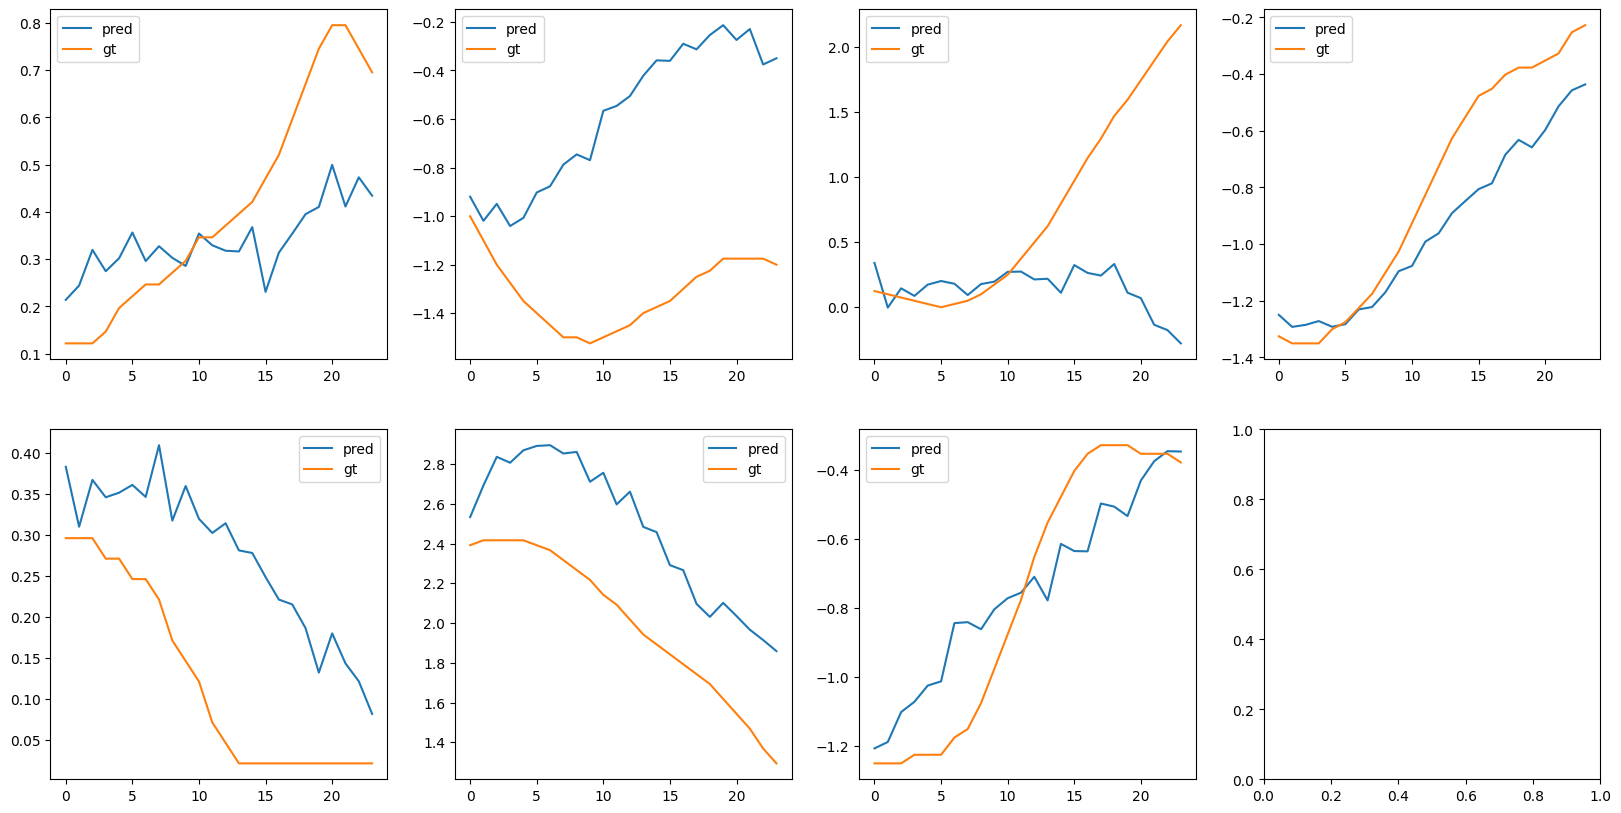

In [8]:
# plots the predictions vs the ground truth
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(2):
    for j in range(4):
        ax[i, j].plot(outputs[i*4+j, :], label='pred')
        ax[i, j].plot(labels[i*4+j, :], label='gt')
        ax[i, j].legend()

## Can we do better?

In our case, there is little justification to move beyond the linear regression setting because of how the data is generated. Nevertheless, nobody is stopping us from trying. Let's now formulate our model as: $$\hat y  = (ReLU(XW^{(1)})) W^{(2)},$$
where $W^{(1)} \in R^{25 \times n_1}, W^{(2)} \in R^{n_1 \times 5}$ are learnable weight matrie and $n_1$ is a hyper-parameter we get to choose.

The main points we want to you to notice from this example are:
1. More complex models do not mean better performance;
2. Hyper-parameter tuning is tedious;
3. **Most importantly**, we can learn any differentiable architecture with the help of SGD.

In [9]:
# define model
import torch
class MLP(torch.nn.Module):
    def __init__(self, n1):
        super(MLP, self).__init__()
        self.linear_collapse = torch.nn.Linear(6, 1)
        self.linear = torch.nn.Linear(192, n1)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(n1, 24)
        
    def forward(self, x):
        y_pred = self.linear2(self.relu(self.linear(torch.squeeze(self.linear_collapse(x)))))
        return y_pred

In [10]:
# train model
best_loss = 1e10
model = MLP(100)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
for epoch in range(100):
    for i, d in enumerate(train_loader):
        # Forward pass
        outputs = model(d.get('inputs'))
        loss = criterion(outputs, torch.squeeze(d.get('outputs')))
        
        # Backward and optimize
        optimizer.zero_grad() # zero the gradient buffer
        loss.backward() # compute gradient
        optimizer.step() # update parameters
        
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # validate model
    with torch.no_grad():
        for i, d in enumerate(val_loader):
            outputs = model(d.get('inputs'))
            loss = criterion(outputs, torch.squeeze(d.get('outputs')))
        print ('Epoch [{}/{}], Val Loss: {:.4f}'.format(epoch+1, 100, loss.item()))
    # save best model based on val loss
    if loss.item() < best_loss:
        best_loss = loss.item()
        torch.save(model.state_dict(), 'best_model.pth')
# load best model
model.load_state_dict(torch.load('best_model.pth'))

Epoch [1/100], Loss: 1.3643
Epoch [1/100], Val Loss: 0.3854
Epoch [2/100], Loss: 0.8237
Epoch [2/100], Val Loss: 0.3330
Epoch [3/100], Loss: 0.9962
Epoch [3/100], Val Loss: 0.4948
Epoch [4/100], Loss: 0.6632
Epoch [4/100], Val Loss: 0.4521
Epoch [5/100], Loss: 0.6440
Epoch [5/100], Val Loss: 0.4368
Epoch [6/100], Loss: 0.5760
Epoch [6/100], Val Loss: 0.4369
Epoch [7/100], Loss: 0.2864
Epoch [7/100], Val Loss: 0.3948
Epoch [8/100], Loss: 0.2445
Epoch [8/100], Val Loss: 0.4001
Epoch [9/100], Loss: 0.3063
Epoch [9/100], Val Loss: 0.3825
Epoch [10/100], Loss: 0.4472
Epoch [10/100], Val Loss: 0.3918
Epoch [11/100], Loss: 0.2324
Epoch [11/100], Val Loss: 0.3808
Epoch [12/100], Loss: 0.5360
Epoch [12/100], Val Loss: 0.4084
Epoch [13/100], Loss: 0.4936
Epoch [13/100], Val Loss: 0.4146
Epoch [14/100], Loss: 0.3100
Epoch [14/100], Val Loss: 0.4294
Epoch [15/100], Loss: 0.3104
Epoch [15/100], Val Loss: 0.4224
Epoch [16/100], Loss: 0.1896
Epoch [16/100], Val Loss: 0.3879
Epoch [17/100], Loss: 0.46

<All keys matched successfully>

In [12]:
# evaluate model on test set
with torch.no_grad():
    #for i, (inputs, labels) in enumerate(test_loader):
    for i, d in enumerate(test_loader):
        outputs = model(d['inputs'])
        labels = torch.squeeze(d['outputs'])
        loss = criterion(outputs, labels)
    print ('Epoch [{}/{}], Test Loss: {:.4f}'.format(epoch+1, 100, loss.item()))

Epoch [100/100], Test Loss: 0.5730


IndexError: index 7 is out of bounds for dimension 0 with size 7

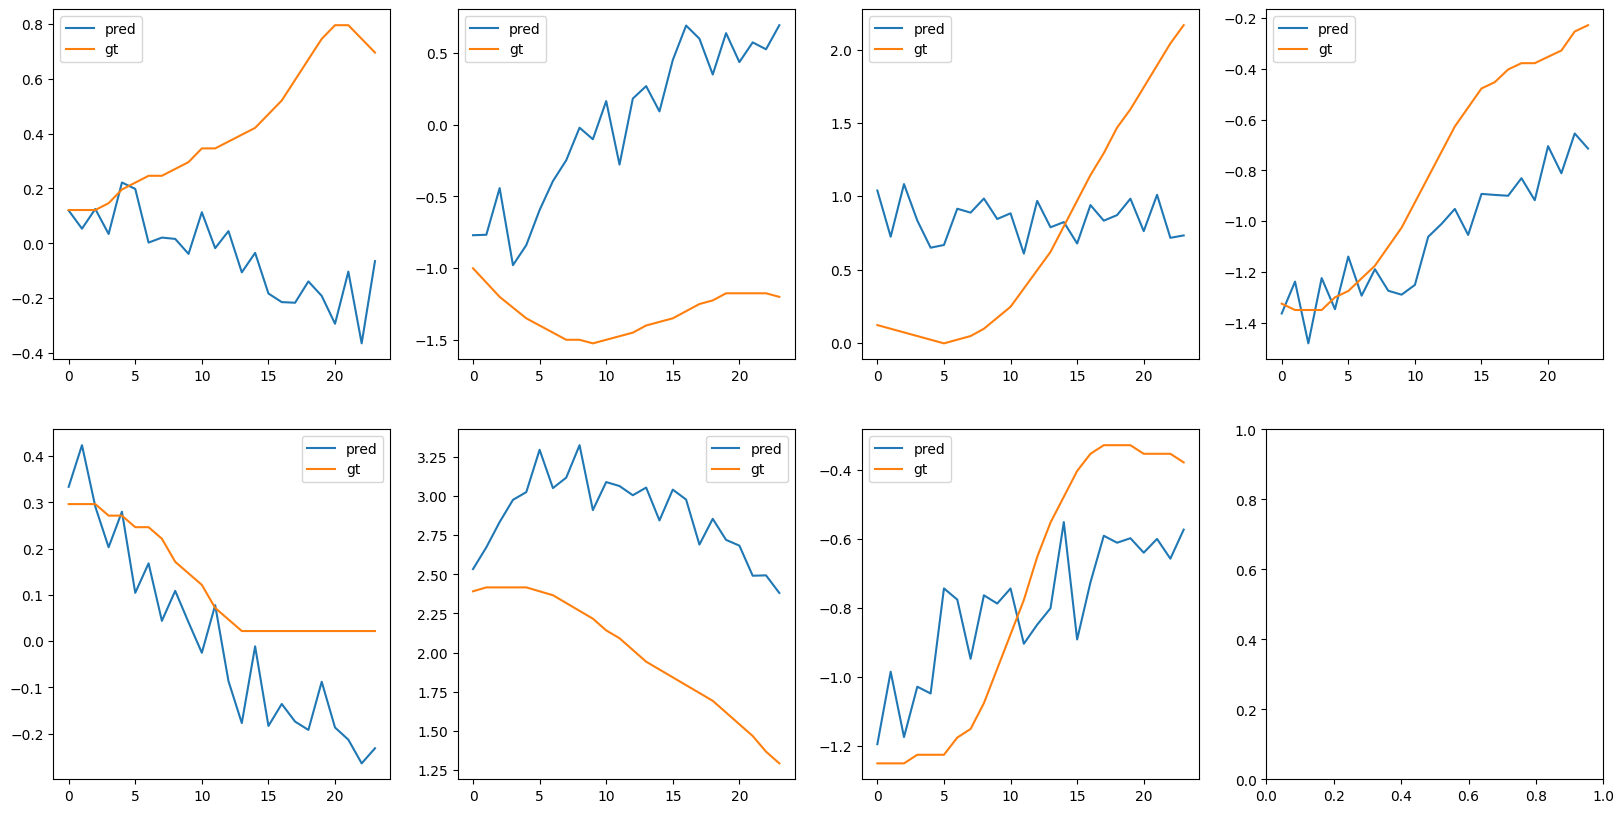

In [13]:
# plots the predictions vs the ground truth
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i in range(2):
    for j in range(4):
        ax[i, j].plot(outputs[i*4+j, :], label='pred')
        ax[i, j].plot(labels[i*4+j, :], label='gt')
        ax[i, j].legend()